In [1]:
import os   #operating system

In [2]:
data_dir="C:/Users/hp/Desktop/cell_images"

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
#using CNN on custom images. On our own png or jpg images

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

In [6]:
#now there is another import that we have to do to read in real image files
from matplotlib.image import imread     #allows us to read image files directly

In [7]:
test_path=data_dir+'/test/'
train_path=data_dir+'/train/'

In [8]:
test_path

'C:/Users/hp/Desktop/cell_images/test/'

In [9]:
os.listdir(test_path)
#these are just the images of cells whether or not they have been infected by malaria

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [11]:
#we are going to attempt to build a model that just based off the image of a cell can predict whether or not it's infected 
#or not infected

In [12]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [13]:
para_cell=train_path+'parasitized/'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [14]:
para_cell

'C:/Users/hp/Desktop/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [15]:
imread(para_cell)
#this imread file automaticall transforms png file into an array for us

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [16]:
imread(para_cell).shape

(148, 142, 3)

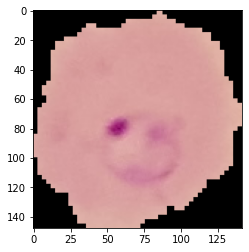

In [17]:
plt.imshow(imread(para_cell))

In [18]:
os.listdir(train_path+'uninfected/')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [19]:
uninfected_cell=train_path+'uninfected/'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [20]:
uninfected_cell

'C:/Users/hp/Desktop/cell_images/train/uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [21]:
uninfected_cell=imread(uninfected_cell)

In [67]:
#imread(uninfected_cell).shape

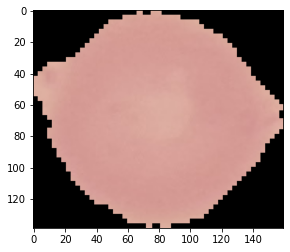

In [22]:
plt.imshow(uninfected_cell)

In [23]:
pwd

'C:\\Users\\hp\\AppData\\Roaming\\SPB_Data'

In [24]:
#let's go ahead and check how many images there are 
len(os.listdir(train_path+'parasitized'))

12480

In [25]:
len(os.listdir(train_path+'uninfected'))

12480

In [26]:
len(os.listdir(test_path+'parasitized'))

1300

In [27]:
len(os.listdir(test_path+'uninfected'))

1300

In [28]:
#since they are real world images it would be impossible if they are all of the same exact shape
#all of them will have different dimensions

dim1=[]
dim2=[]

for image_filename in os.listdir(test_path+'uninfected'):
    
    img=imread(test_path+'uninfected/'+image_filename)
    d1,d2,color=img.shape      #img is of 3 dimensions as we hace seen earlier width, height and shape
    dim1.append(d1)
    dim2.append(d2)

In [29]:
dim1     #all of them are of different dimensions. same with dim2

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


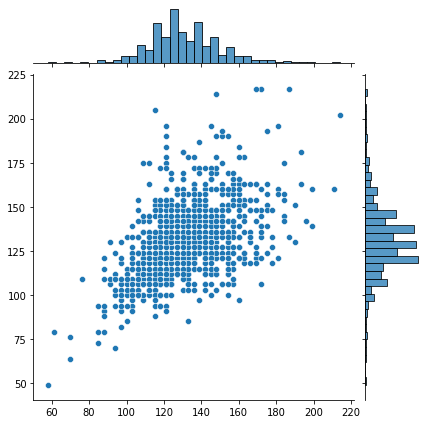

In [30]:
sns.jointplot(dim1,dim2)

In [31]:
#the convolutional neural network isn't going to be able to train on images of various sizes. So what we need to do is to make
#sure that we are going to resize all the images to be the same size. So we have to choose what actual dimensions should we 
#resize everything to.
#And what we should choose is essentially the average of both the dimensions. The above jointplot indicates the avg distribution
#of both the dimensions and they are all centred around 130*130.

In [32]:
np.mean(dim1)

130.92538461538462

In [33]:
np.mean(dim2)

130.75

In [34]:
#so what we are going to do is we will say our final shape that we will be feeding in our convolutional network is (130,130,3)
image_shape=(130,130,3)
#later when we are preparing our model we will resize everything to these dimensions.
#Smaller photo -->Padding
#Larger Photo --> crop or shrink

In [35]:
#manipulating images

In [36]:
#our files are going to be very large when we are going to read them
130*130*3

50700

In [37]:
#so now we will be dealing with 50700 datapoints, because of that we are not gonna be able to just feed in everything at once
#instead we will have to select the batches of our images

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [39]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [40]:
imread(para_cell).max()
#the images are already scaled so we don't need to normalize anything in the instance of imagedatagenerator. If it wasn't the
#case we would have done 1/255

0.9098039

In [41]:
#Mnist dataset was 60000 images. Our cell dataset is less than 3o thousand images. So, we want to be able is to expand the 
#amount of images without having to gather more data. We can't just keep grabbing blood cells from people. So what we can do
#is do things like take our current images and randomly rotate them.
image_gen=ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

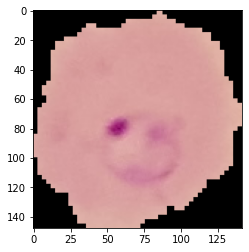

In [42]:
para_img=imread(para_cell)
plt.imshow(para_img)

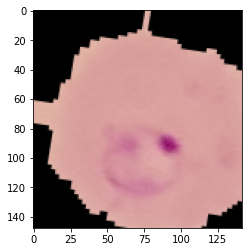

In [43]:
plt.imshow(image_gen.random_transform(para_img))

In [44]:
#now since we can randomly transform images, we can essentially augment our dataset. We are no longer restricted to just the 
#single image from the cell, we can randomly transform it many times over. So if we keep running the above cell we will keep
#running more and more random transformations. And this is a way of artificially expanding our image dataset.
#So ImageDataGenerator is a very powerful tool that we have to keep in mind when we are dealing with kind of smaller datasets
#And when it comes to CNN it takes thousands and thousands of images to get something that performs really well

In [45]:
train_path

'C:/Users/hp/Desktop/cell_images/train/'

In [46]:
#so now we actually set up our directories to flow batches from a directory
image_gen.flow_from_directory(train_path)
#how does flow form directory knows images and total classes. In order to use it, we must organize the images in subdirectories
#This is an absolute requirement, otherwise the method won't work. The directory should only contain images of one class,
#so one folder per class of images. (google for more)

Found 24958 images belonging to 2 classes.


In [48]:
os.listdir(train_path)
#we have 1 folder per class insider train path. This is a condition for flow from directory to work

['parasitized', 'uninfected']

In [49]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten

In [53]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#the larger the image sizes and more complex of a task we are dealing with the more convolutional layers that we should have
#check stack overflow for rules for selecting number of conv layers
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
#https://stackoverflow.com/questions/60390707/how-to-choose-the-number-of-convolution-layers-and-filters-in-cnn
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())    #converting 2D image features to 1D

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

In [56]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [57]:
batch_size=16

In [58]:
image_shape

(130, 130, 3)

In [59]:
image_shape[:2]

(130, 130)

In [60]:
train_image_gen=image_gen.flow_from_directory(train_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [61]:
test_image_gen=image_gen.flow_from_directory(test_path,
                                             target_size=image_shape[:2],
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                            shuffle=False)

Found 2600 images belonging to 2 classes.


In [63]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [65]:
results=model.fit(train_image_gen,epochs=20,
                           validation_data=test_image_gen,
                           callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1560 steps, validate for 163 steps
Epoch 1/20
  13/1560 [..............................] - ETA: 48:56 - loss: 0.7336 - accuracy: 0.5104WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy


KeyboardInterrupt: 

In [ ]:
#for evaluation look at the lecture
#https://www.youtube.com/watch?v=Ahy50JCRYNk
#https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html